In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



In [3]:
num_robot = 48
fieldsPerKilobot = 6
experiment_time = 1800

In [17]:
bin_edges = np.linspace(-0.475, 0.475, 21)
bin_edges

array([-0.475, -0.427, -0.38, -0.332, -0.285, -0.237, -0.19, -0.142, -0.095, -0.0475, 0, 0.0475, 0.095, 0.143, 0.19, 0.238, 0.285, 0.333, 0.38, 0.427, 0.475])

In [18]:
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results//standalone_circular'

In [19]:
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results//standalone_circular exists


### kiloLOG labels

time id stato posx posy ori stato

In [20]:
kiloLOG_label = ['time']
for i in range(0, num_robot*fieldsPerKilobot, fieldsPerKilobot):
    kiloLOG_label += ['id' + str(i // fieldsPerKilobot), 'state' + str(i // fieldsPerKilobot), 'posx' + str(i // fieldsPerKilobot), 'posy' + str(i // fieldsPerKilobot), 'ori' + str(i // fieldsPerKilobot), 'state' + str(i // fieldsPerKilobot)]
    
# print(kiloLOG_label)

### Position Y labels

In [21]:
kiloPOSY_label = []
for i in range(num_robot):
    kiloPOSY_label += ["posy"+str(i)]

print(kiloPOSY_label)

['posy0', 'posy1', 'posy2', 'posy3', 'posy4', 'posy5', 'posy6', 'posy7', 'posy8', 'posy9', 'posy10', 'posy11', 'posy12', 'posy13', 'posy14', 'posy15', 'posy16', 'posy17', 'posy18', 'posy19', 'posy20', 'posy21', 'posy22', 'posy23', 'posy24', 'posy25', 'posy26', 'posy27', 'posy28', 'posy29', 'posy30', 'posy31', 'posy32', 'posy33', 'posy34', 'posy35', 'posy36', 'posy37', 'posy38', 'posy39', 'posy40', 'posy41', 'posy42', 'posy43', 'posy44', 'posy45', 'posy46', 'posy47']


### Position X labels

In [22]:
kiloPOSX_label = []
for i in range(num_robot):
    kiloPOSX_label += ["posx"+str(i)]

print(kiloPOSX_label)

['posx0', 'posx1', 'posx2', 'posx3', 'posx4', 'posx5', 'posx6', 'posx7', 'posx8', 'posx9', 'posx10', 'posx11', 'posx12', 'posx13', 'posx14', 'posx15', 'posx16', 'posx17', 'posx18', 'posx19', 'posx20', 'posx21', 'posx22', 'posx23', 'posx24', 'posx25', 'posx26', 'posx27', 'posx28', 'posx29', 'posx30', 'posx31', 'posx32', 'posx33', 'posx34', 'posx35', 'posx36', 'posx37', 'posx38', 'posx39', 'posx40', 'posx41', 'posx42', 'posx43', 'posx44', 'posx45', 'posx46', 'posx47']


Timeout folder: standalone_2021-06-18_robots#48_timeout#1_redAreas#8_1800#seconds
	timeout: 10
	filename:  seed#1_kiloLOG.tsv
	filename:  seed#2_kiloLOG.tsv
	filename:  seed#3_kiloLOG.tsv
	filename:  seed#4_kiloLOG.tsv
	filename:  seed#5_kiloLOG.tsv
	filename:  seed#6_kiloLOG.tsv
	filename:  seed#7_kiloLOG.tsv
	filename:  seed#8_kiloLOG.tsv
	filename:  seed#9_kiloLOG.tsv
	filename:  seed#10_kiloLOG.tsv
	filename:  seed#11_kiloLOG.tsv
	filename:  seed#12_kiloLOG.tsv
	filename:  seed#13_kiloLOG.tsv
	filename:  seed#14_kiloLOG.tsv
	filename:  seed#15_kiloLOG.tsv
	filename:  seed#16_kiloLOG.tsv
	filename:  seed#17_kiloLOG.tsv
	filename:  seed#18_kiloLOG.tsv
	filename:  seed#19_kiloLOG.tsv
	filename:  seed#20_kiloLOG.tsv
	filename:  seed#21_kiloLOG.tsv
	filename:  seed#22_kiloLOG.tsv
	filename:  seed#23_kiloLOG.tsv
	filename:  seed#24_kiloLOG.tsv
	filename:  seed#25_kiloLOG.tsv
	filename:  seed#26_kiloLOG.tsv
	filename:  seed#27_kiloLOG.tsv
	filename:  seed#28_kiloLOG.tsv
	filename:  seed#2

	filename:  seed#52_kiloLOG.tsv
	filename:  seed#53_kiloLOG.tsv
	filename:  seed#54_kiloLOG.tsv
	filename:  seed#55_kiloLOG.tsv
	filename:  seed#56_kiloLOG.tsv
	filename:  seed#57_kiloLOG.tsv
	filename:  seed#58_kiloLOG.tsv
	filename:  seed#59_kiloLOG.tsv
	filename:  seed#60_kiloLOG.tsv
	filename:  seed#61_kiloLOG.tsv
	filename:  seed#62_kiloLOG.tsv
	filename:  seed#63_kiloLOG.tsv
	filename:  seed#64_kiloLOG.tsv
	filename:  seed#65_kiloLOG.tsv
	filename:  seed#66_kiloLOG.tsv
	filename:  seed#67_kiloLOG.tsv
	filename:  seed#68_kiloLOG.tsv
	filename:  seed#69_kiloLOG.tsv
	filename:  seed#70_kiloLOG.tsv
	filename:  seed#71_kiloLOG.tsv
	filename:  seed#72_kiloLOG.tsv
	filename:  seed#73_kiloLOG.tsv
	filename:  seed#74_kiloLOG.tsv
	filename:  seed#75_kiloLOG.tsv
	filename:  seed#76_kiloLOG.tsv
	filename:  seed#77_kiloLOG.tsv
	filename:  seed#78_kiloLOG.tsv
	filename:  seed#79_kiloLOG.tsv
	filename:  seed#80_kiloLOG.tsv
	filename:  seed#81_kiloLOG.tsv
	filename:  seed#82_kiloLOG.tsv
	filenam

	filename:  seed#7_kiloLOG.tsv
	filename:  seed#8_kiloLOG.tsv
	filename:  seed#9_kiloLOG.tsv
	filename:  seed#10_kiloLOG.tsv
	filename:  seed#11_kiloLOG.tsv
	filename:  seed#12_kiloLOG.tsv
	filename:  seed#13_kiloLOG.tsv
	filename:  seed#14_kiloLOG.tsv
	filename:  seed#15_kiloLOG.tsv
	filename:  seed#16_kiloLOG.tsv
	filename:  seed#17_kiloLOG.tsv
	filename:  seed#18_kiloLOG.tsv
	filename:  seed#19_kiloLOG.tsv
	filename:  seed#20_kiloLOG.tsv
	filename:  seed#21_kiloLOG.tsv
	filename:  seed#22_kiloLOG.tsv
	filename:  seed#23_kiloLOG.tsv
	filename:  seed#24_kiloLOG.tsv
	filename:  seed#25_kiloLOG.tsv
	filename:  seed#26_kiloLOG.tsv
	filename:  seed#27_kiloLOG.tsv
	filename:  seed#28_kiloLOG.tsv
	filename:  seed#29_kiloLOG.tsv
	filename:  seed#30_kiloLOG.tsv
	filename:  seed#31_kiloLOG.tsv
	filename:  seed#32_kiloLOG.tsv
	filename:  seed#33_kiloLOG.tsv
	filename:  seed#34_kiloLOG.tsv
	filename:  seed#35_kiloLOG.tsv
	filename:  seed#36_kiloLOG.tsv
	filename:  seed#37_kiloLOG.tsv
	filename: 

	filename:  seed#58_kiloLOG.tsv
	filename:  seed#59_kiloLOG.tsv
	filename:  seed#60_kiloLOG.tsv
	filename:  seed#61_kiloLOG.tsv
	filename:  seed#62_kiloLOG.tsv
	filename:  seed#63_kiloLOG.tsv
	filename:  seed#64_kiloLOG.tsv
	filename:  seed#65_kiloLOG.tsv
	filename:  seed#66_kiloLOG.tsv
	filename:  seed#67_kiloLOG.tsv
	filename:  seed#68_kiloLOG.tsv
	filename:  seed#69_kiloLOG.tsv
	filename:  seed#70_kiloLOG.tsv
	filename:  seed#71_kiloLOG.tsv
	filename:  seed#72_kiloLOG.tsv
	filename:  seed#73_kiloLOG.tsv
	filename:  seed#74_kiloLOG.tsv
	filename:  seed#75_kiloLOG.tsv
	filename:  seed#76_kiloLOG.tsv
	filename:  seed#77_kiloLOG.tsv
	filename:  seed#78_kiloLOG.tsv
	filename:  seed#79_kiloLOG.tsv
	filename:  seed#80_kiloLOG.tsv
	filename:  seed#81_kiloLOG.tsv
	filename:  seed#82_kiloLOG.tsv
	filename:  seed#83_kiloLOG.tsv
	filename:  seed#84_kiloLOG.tsv
	filename:  seed#85_kiloLOG.tsv
	filename:  seed#86_kiloLOG.tsv
	filename:  seed#87_kiloLOG.tsv
	filename:  seed#88_kiloLOG.tsv
	filenam

	filename:  seed#8_kiloLOG.tsv
	filename:  seed#9_kiloLOG.tsv
	filename:  seed#10_kiloLOG.tsv
	filename:  seed#11_kiloLOG.tsv
	filename:  seed#12_kiloLOG.tsv
	filename:  seed#13_kiloLOG.tsv
	filename:  seed#14_kiloLOG.tsv
	filename:  seed#15_kiloLOG.tsv
	filename:  seed#16_kiloLOG.tsv
	filename:  seed#17_kiloLOG.tsv
	filename:  seed#18_kiloLOG.tsv
	filename:  seed#19_kiloLOG.tsv
	filename:  seed#20_kiloLOG.tsv
	filename:  seed#21_kiloLOG.tsv
	filename:  seed#22_kiloLOG.tsv
	filename:  seed#23_kiloLOG.tsv
	filename:  seed#24_kiloLOG.tsv
	filename:  seed#25_kiloLOG.tsv
	filename:  seed#26_kiloLOG.tsv
	filename:  seed#27_kiloLOG.tsv
	filename:  seed#28_kiloLOG.tsv
	filename:  seed#29_kiloLOG.tsv
	filename:  seed#30_kiloLOG.tsv
	filename:  seed#31_kiloLOG.tsv
	filename:  seed#32_kiloLOG.tsv
	filename:  seed#33_kiloLOG.tsv
	filename:  seed#34_kiloLOG.tsv
	filename:  seed#35_kiloLOG.tsv
	filename:  seed#36_kiloLOG.tsv
	filename:  seed#37_kiloLOG.tsv
	filename:  seed#38_kiloLOG.tsv
	filename:

/home/luigi/.virtualenvs/argos/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/luigi/.virtualenvs/argos/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Timeout folder: standalone_2021-06-18_robots#48_timeout#54_redAreas#8_1800#seconds
	timeout: 540
	filename:  seed#1_kiloLOG.tsv
	filename:  seed#2_kiloLOG.tsv
	filename:  seed#3_kiloLOG.tsv
	filename:  seed#4_kiloLOG.tsv
	filename:  seed#5_kiloLOG.tsv
	filename:  seed#6_kiloLOG.tsv
	filename:  seed#7_kiloLOG.tsv
	filename:  seed#8_kiloLOG.tsv
	filename:  seed#9_kiloLOG.tsv
	filename:  seed#10_kiloLOG.tsv
	filename:  seed#11_kiloLOG.tsv
	filename:  seed#12_kiloLOG.tsv
	filename:  seed#13_kiloLOG.tsv
	filename:  seed#14_kiloLOG.tsv
	filename:  seed#15_kiloLOG.tsv
	filename:  seed#16_kiloLOG.tsv
	filename:  seed#17_kiloLOG.tsv
	filename:  seed#18_kiloLOG.tsv
	filename:  seed#19_kiloLOG.tsv
	filename:  seed#20_kiloLOG.tsv
	filename:  seed#21_kiloLOG.tsv
	filename:  seed#22_kiloLOG.tsv
	filename:  seed#23_kiloLOG.tsv
	filename:  seed#24_kiloLOG.tsv
	filename:  seed#25_kiloLOG.tsv
	filename:  seed#26_kiloLOG.tsv
	filename:  seed#27_kiloLOG.tsv
	filename:  seed#28_kiloLOG.tsv
	filename:  seed

	filename:  seed#49_kiloLOG.tsv
	filename:  seed#50_kiloLOG.tsv
	filename:  seed#51_kiloLOG.tsv
	filename:  seed#52_kiloLOG.tsv
	filename:  seed#53_kiloLOG.tsv
	filename:  seed#54_kiloLOG.tsv
	filename:  seed#55_kiloLOG.tsv
	filename:  seed#56_kiloLOG.tsv
	filename:  seed#57_kiloLOG.tsv
	filename:  seed#58_kiloLOG.tsv
	filename:  seed#59_kiloLOG.tsv
	filename:  seed#60_kiloLOG.tsv
	filename:  seed#61_kiloLOG.tsv
	filename:  seed#62_kiloLOG.tsv
	filename:  seed#63_kiloLOG.tsv
	filename:  seed#64_kiloLOG.tsv
	filename:  seed#65_kiloLOG.tsv
	filename:  seed#66_kiloLOG.tsv
	filename:  seed#67_kiloLOG.tsv
	filename:  seed#68_kiloLOG.tsv
	filename:  seed#69_kiloLOG.tsv
	filename:  seed#70_kiloLOG.tsv
	filename:  seed#71_kiloLOG.tsv
	filename:  seed#72_kiloLOG.tsv
	filename:  seed#73_kiloLOG.tsv
	filename:  seed#74_kiloLOG.tsv
	filename:  seed#75_kiloLOG.tsv
	filename:  seed#76_kiloLOG.tsv
	filename:  seed#77_kiloLOG.tsv
	filename:  seed#78_kiloLOG.tsv
	filename:  seed#79_kiloLOG.tsv
	filenam

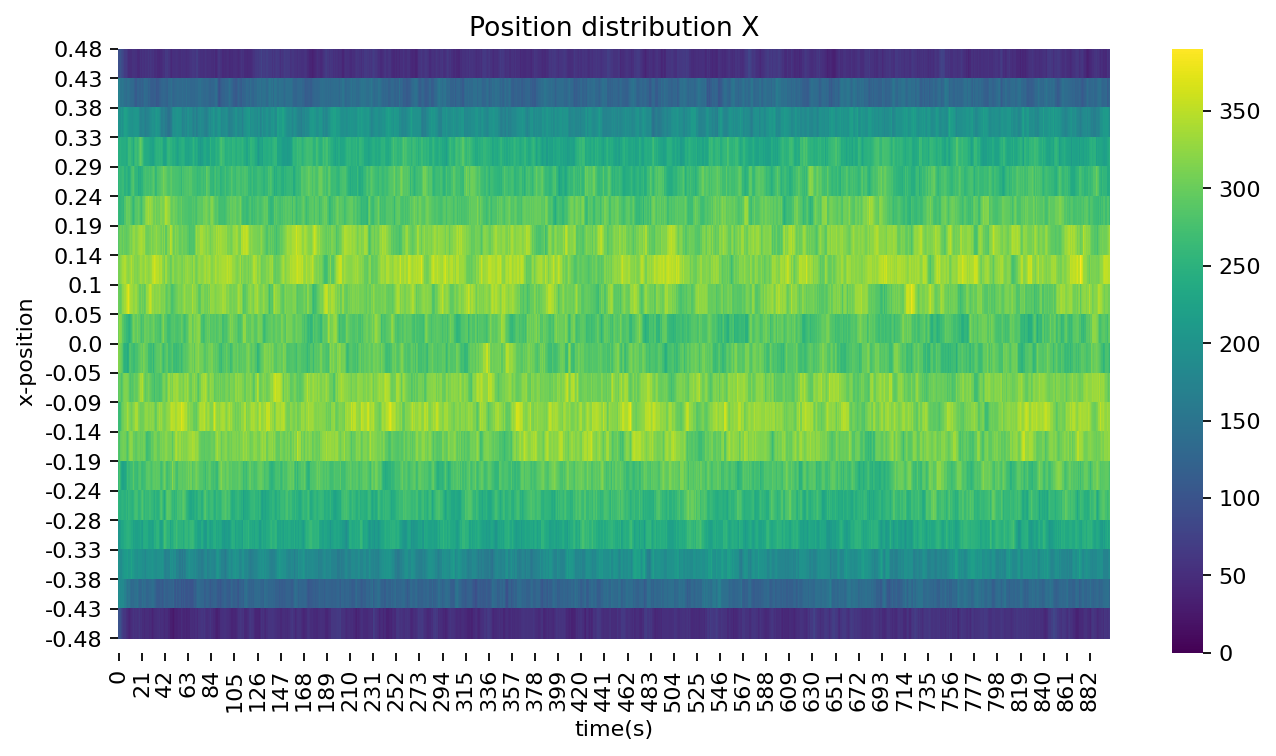

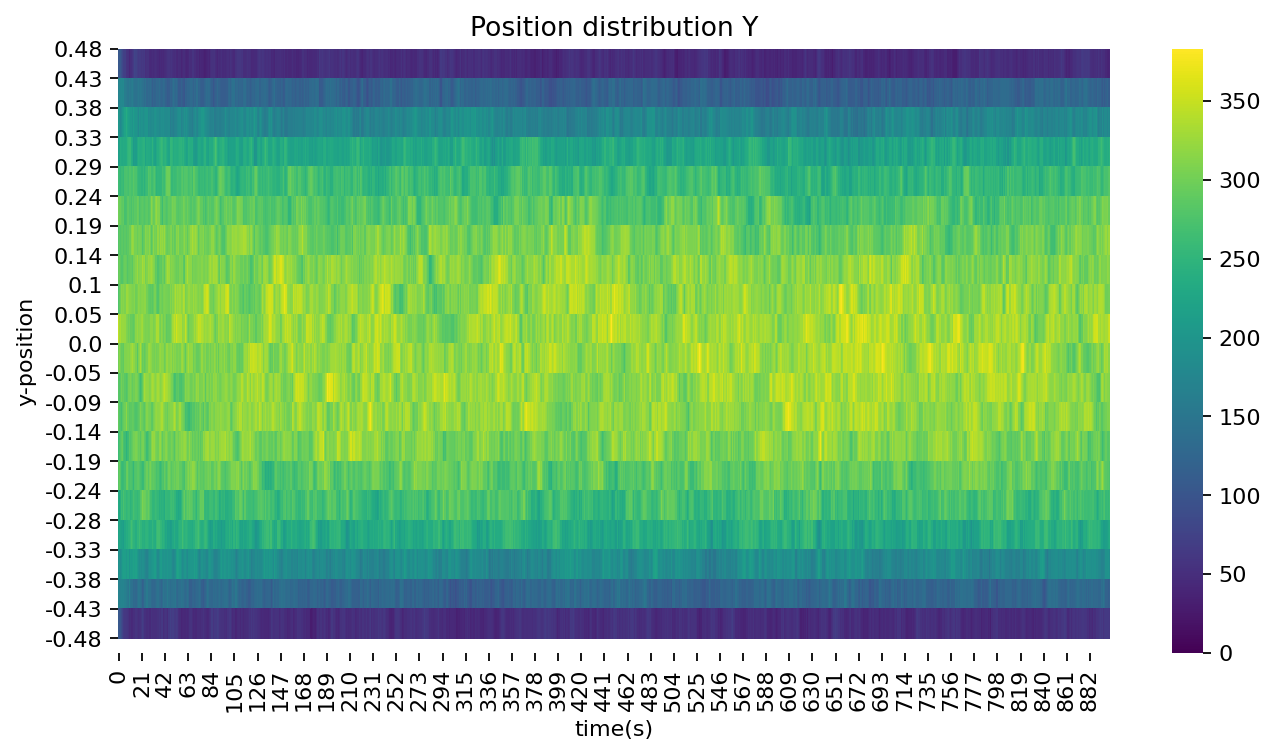

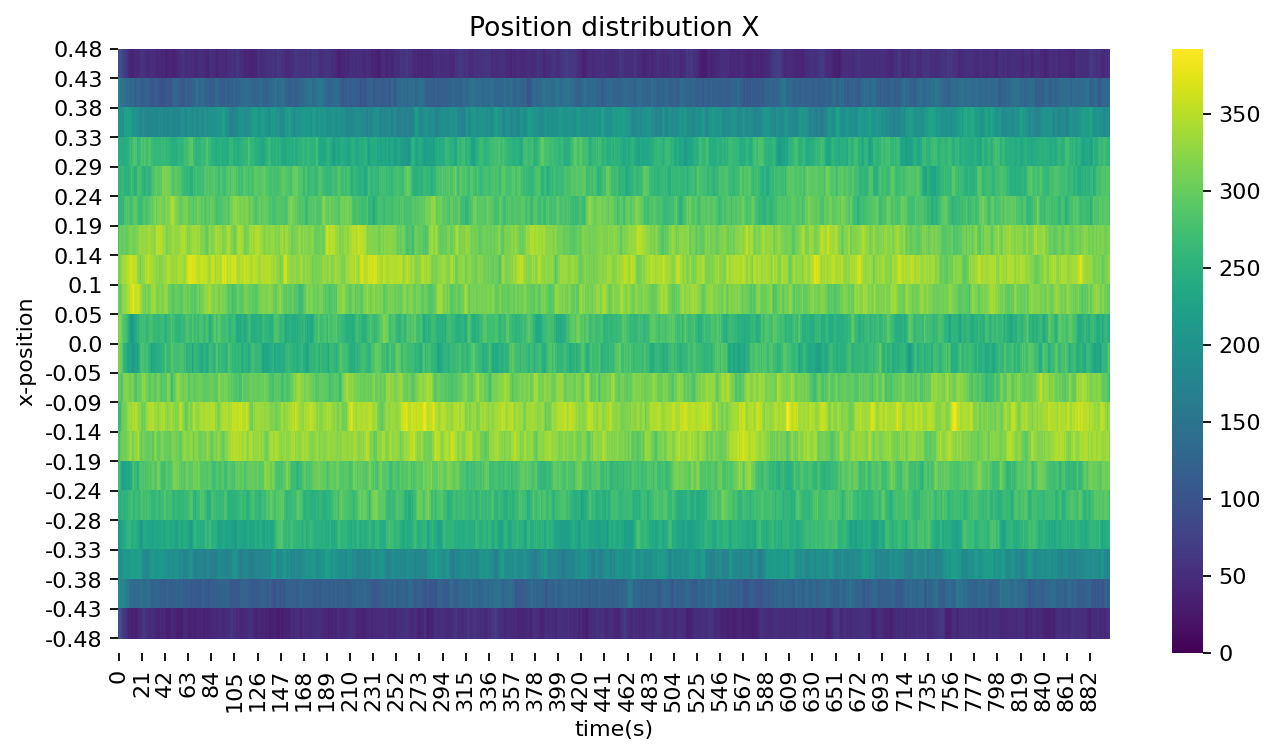

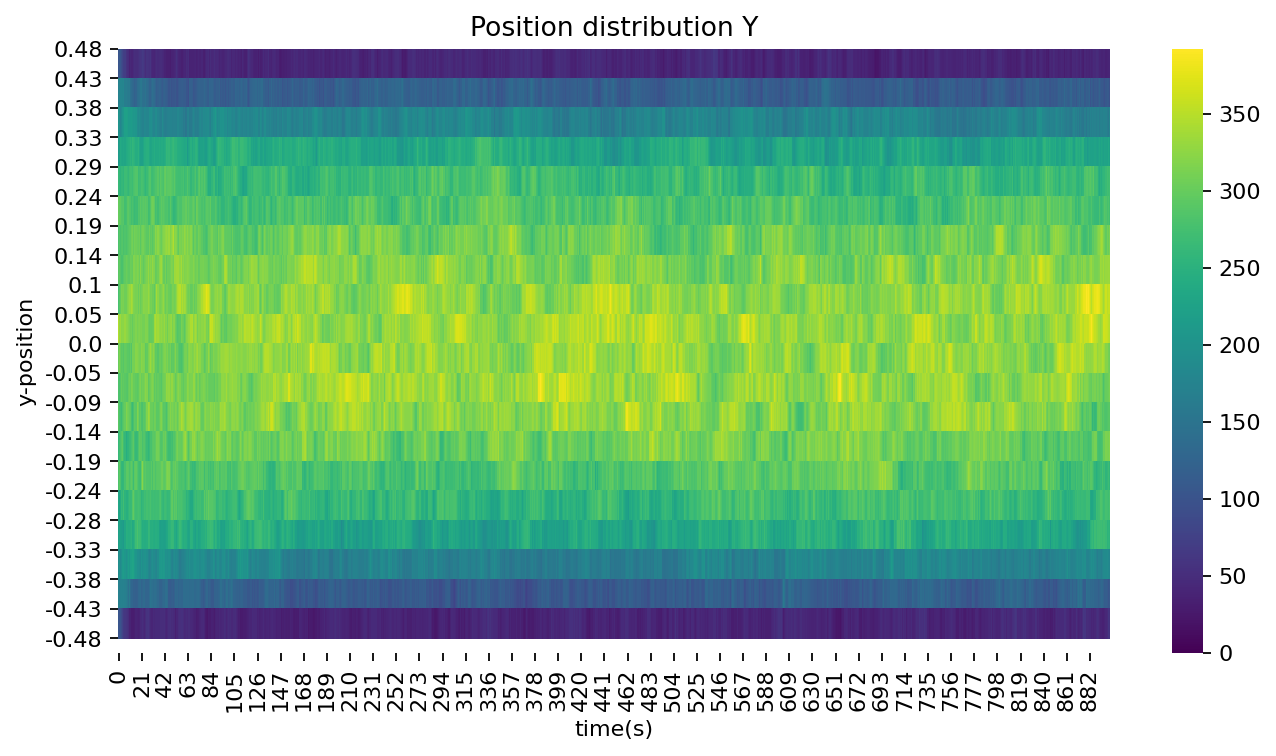

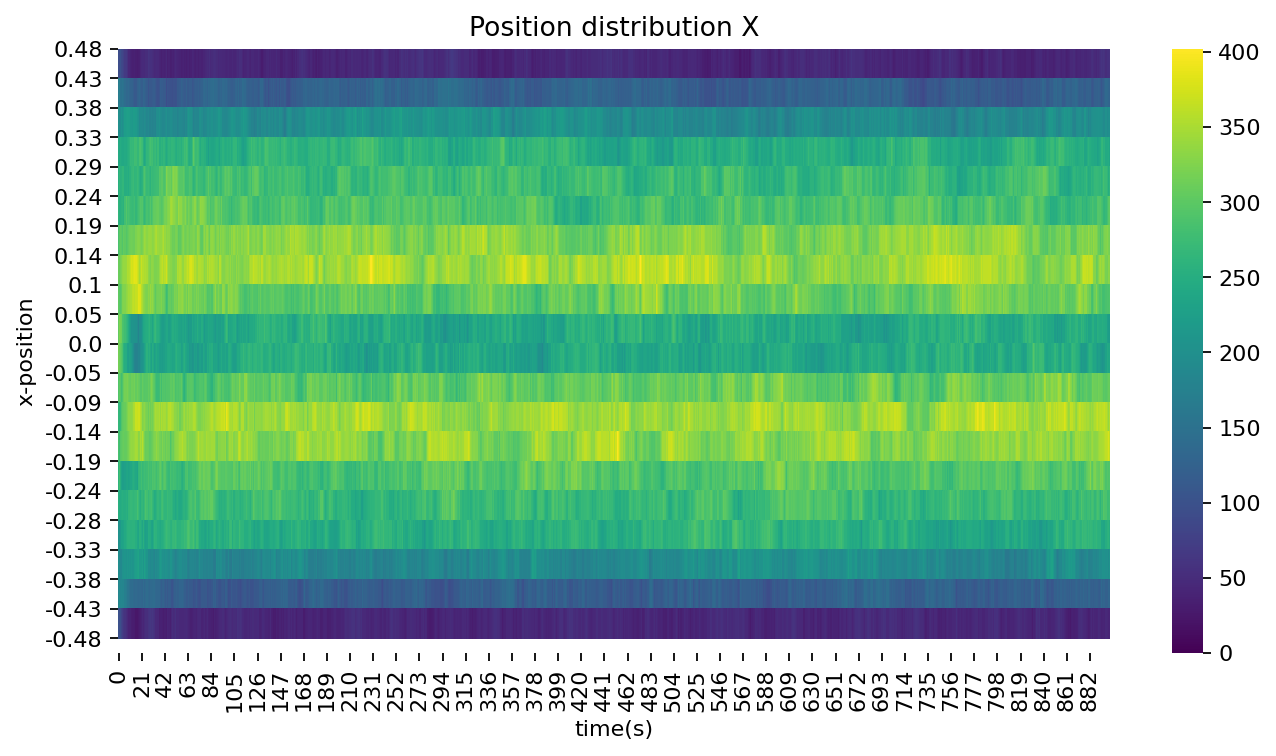

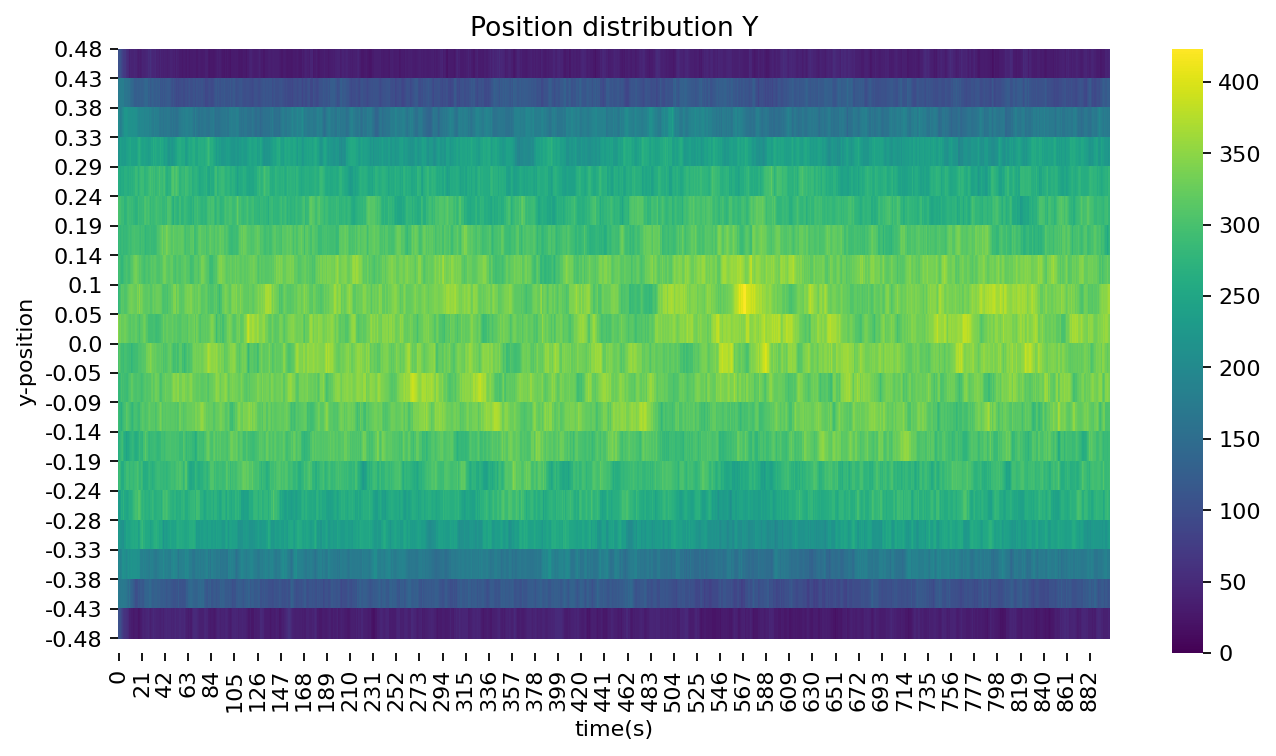

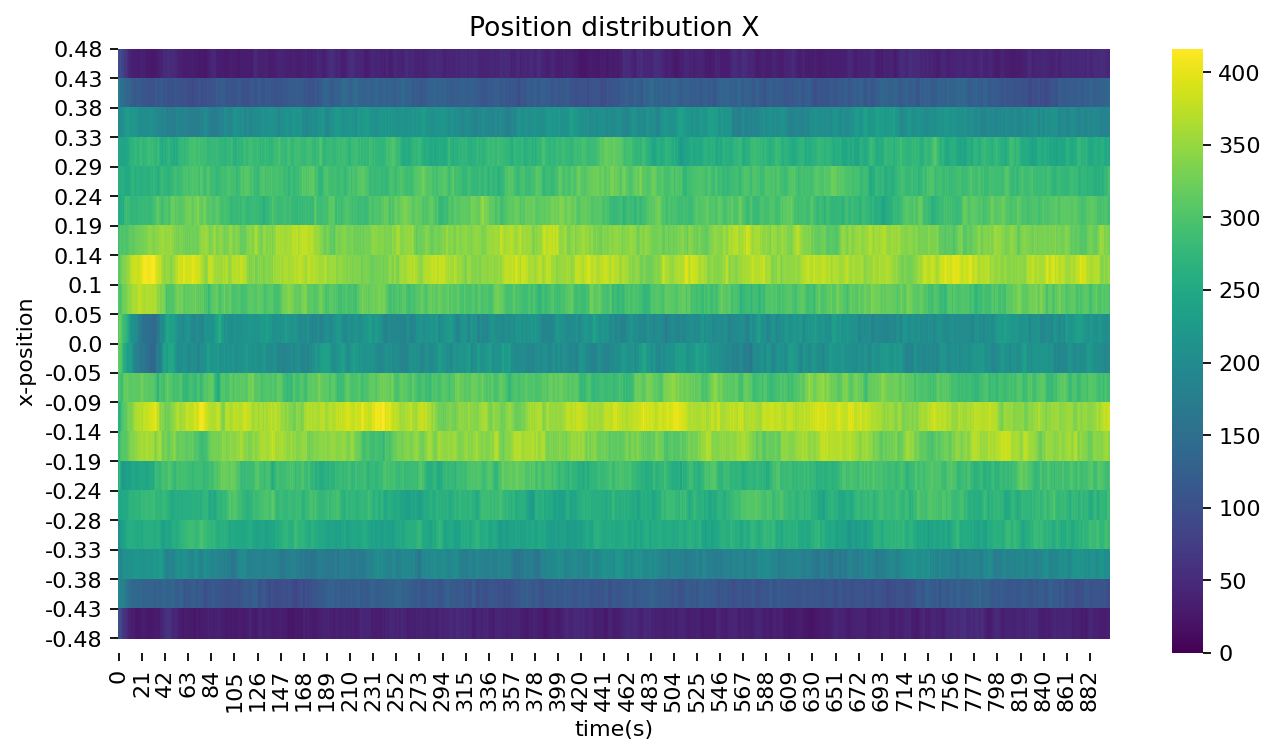

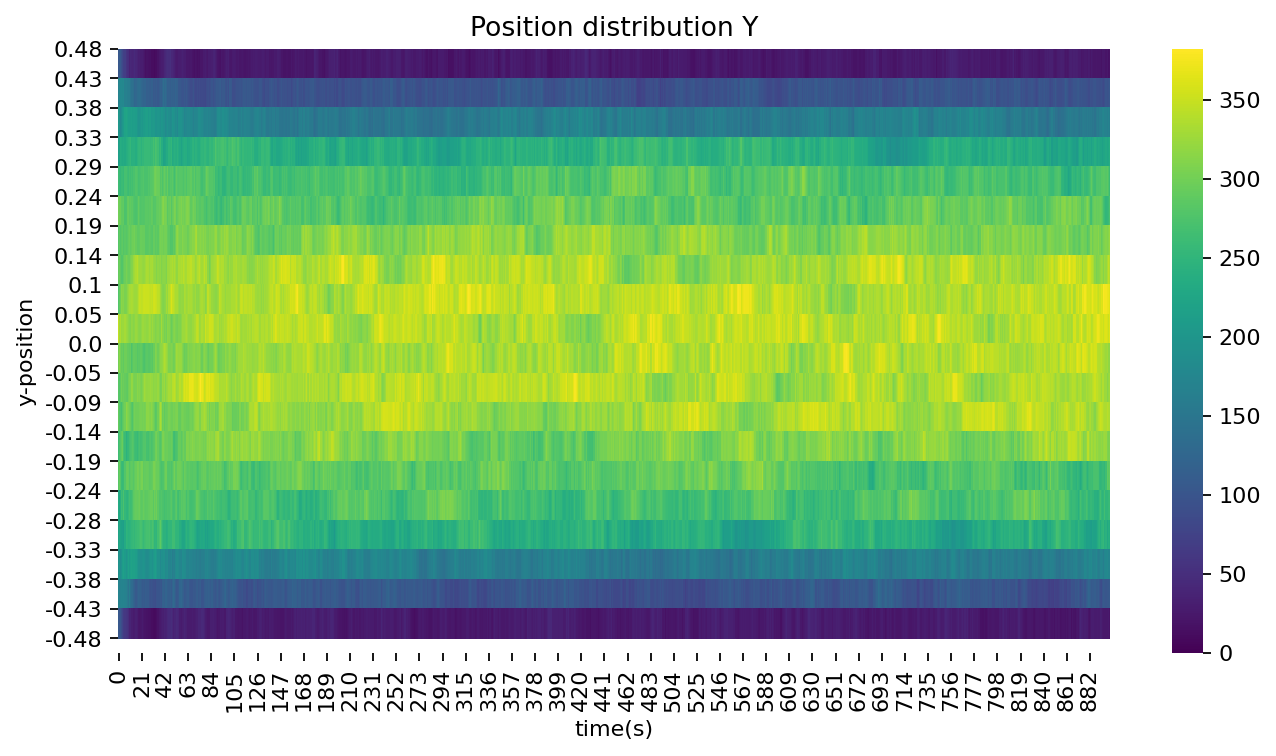

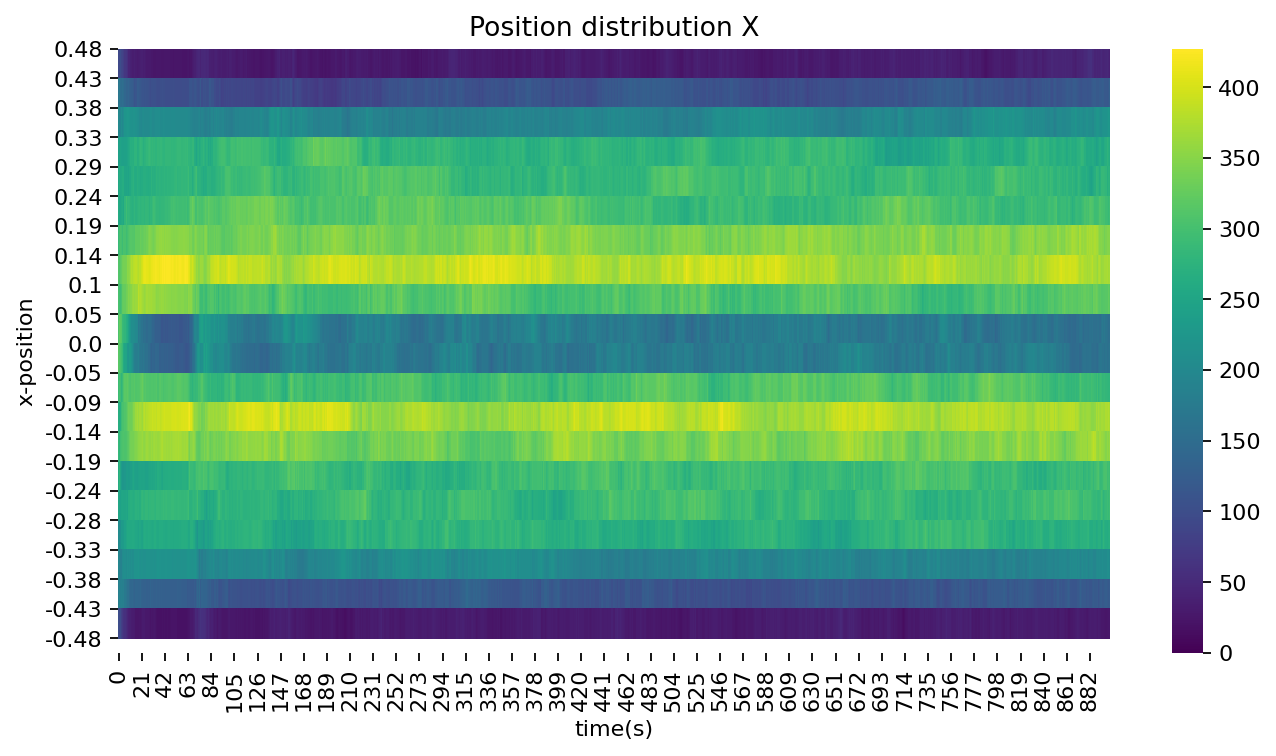

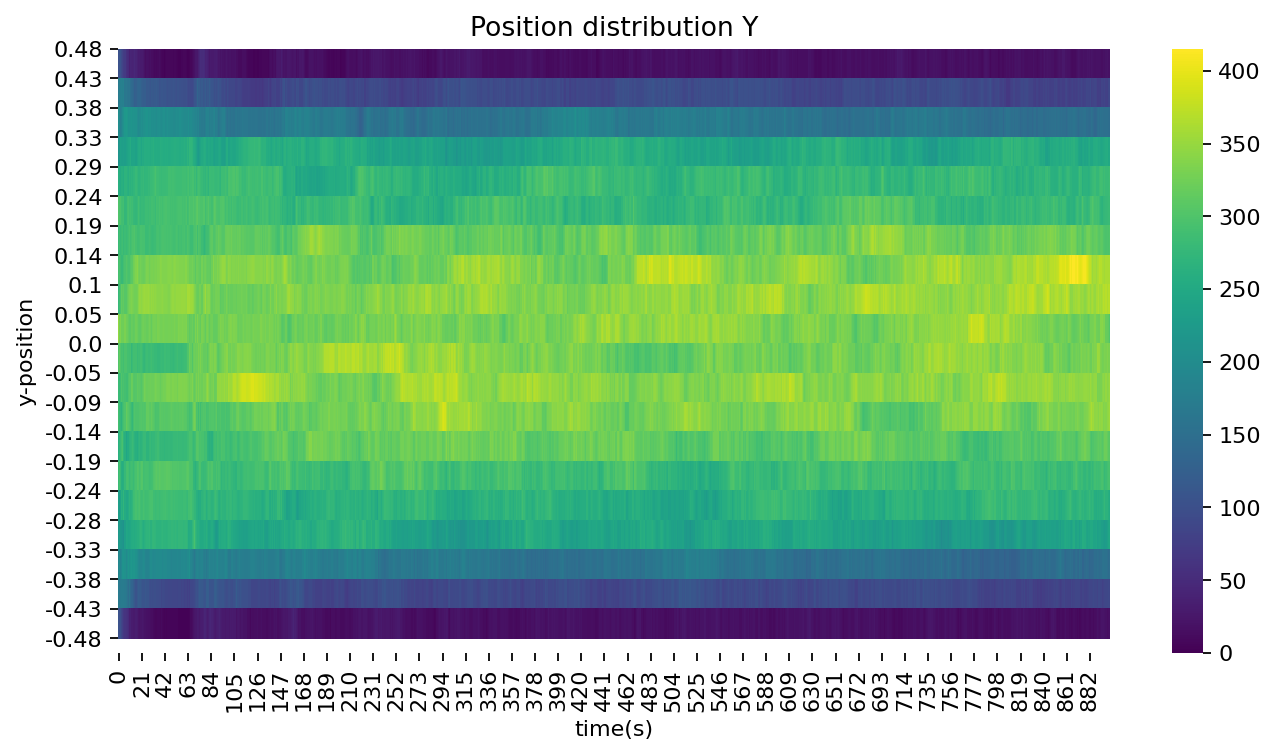

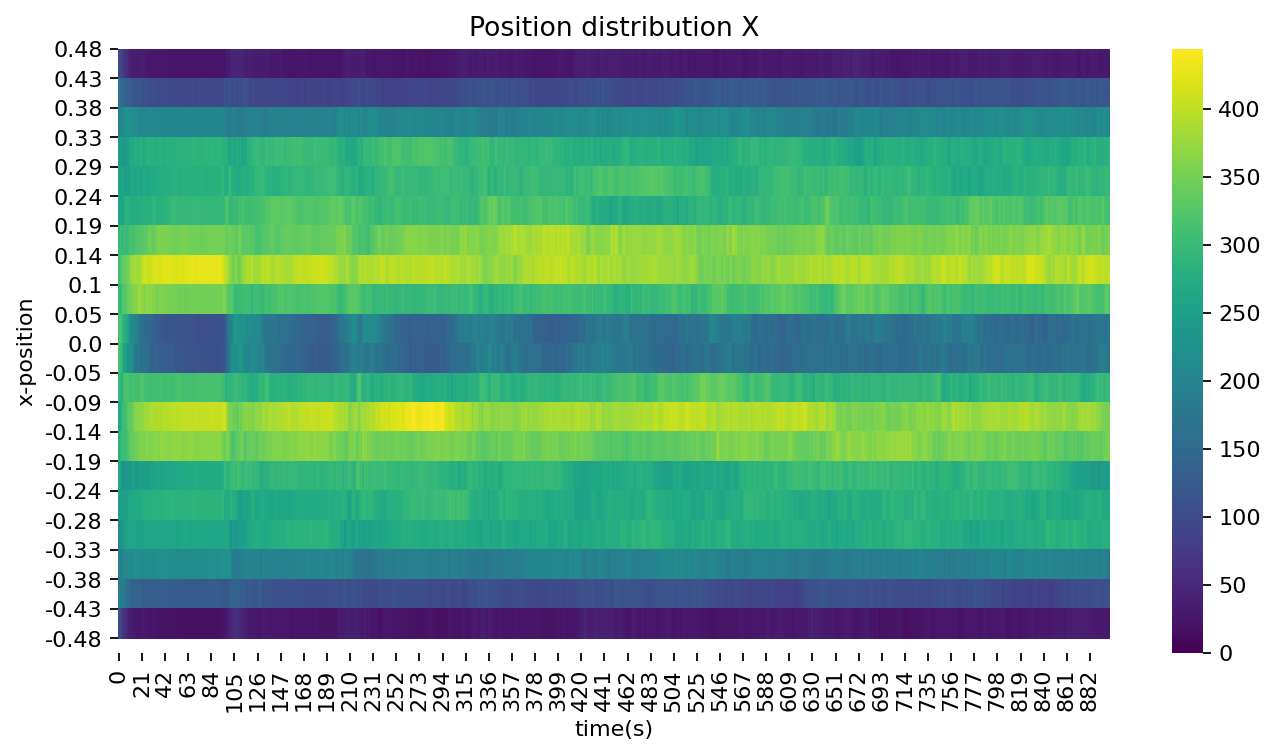

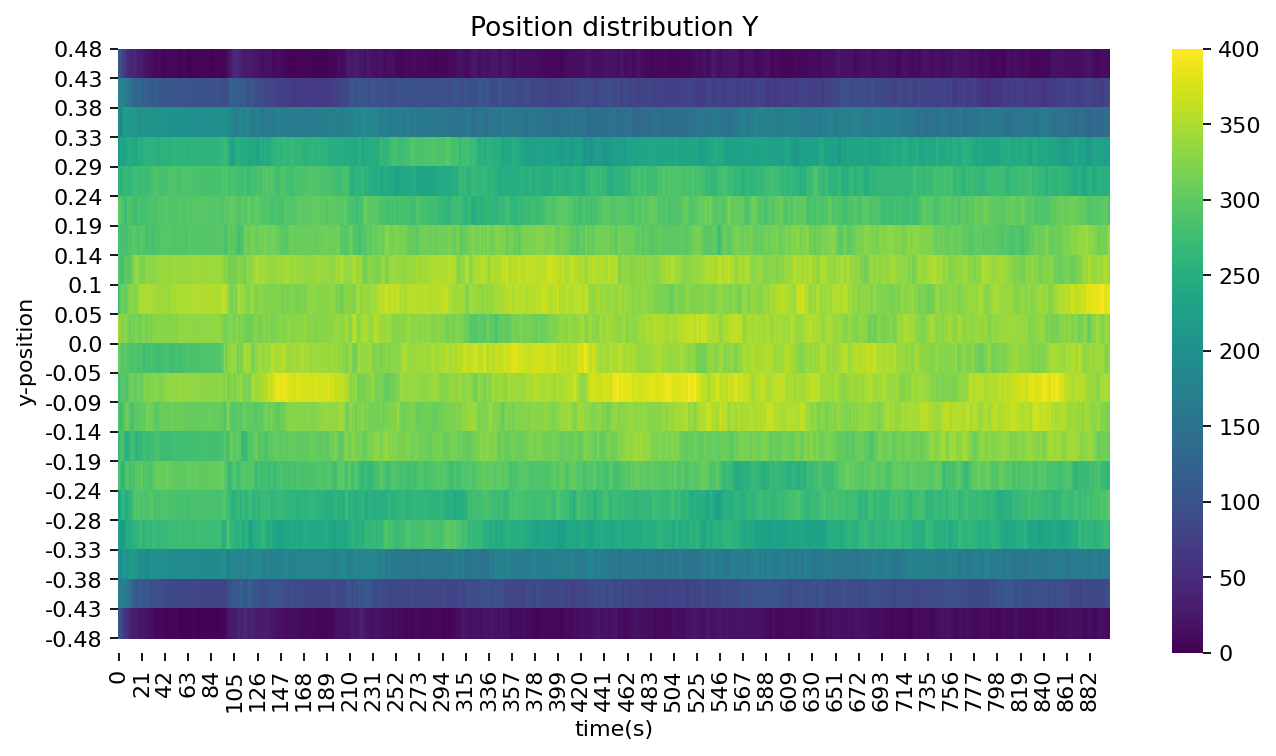

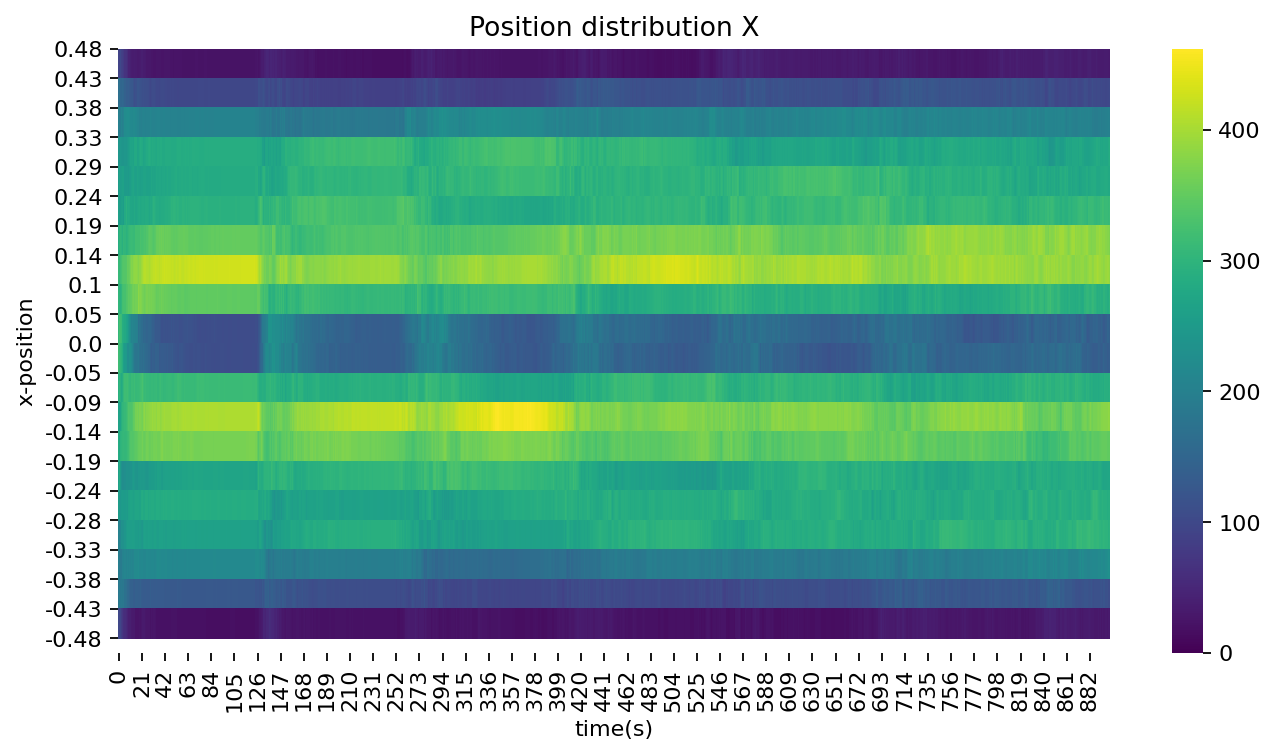

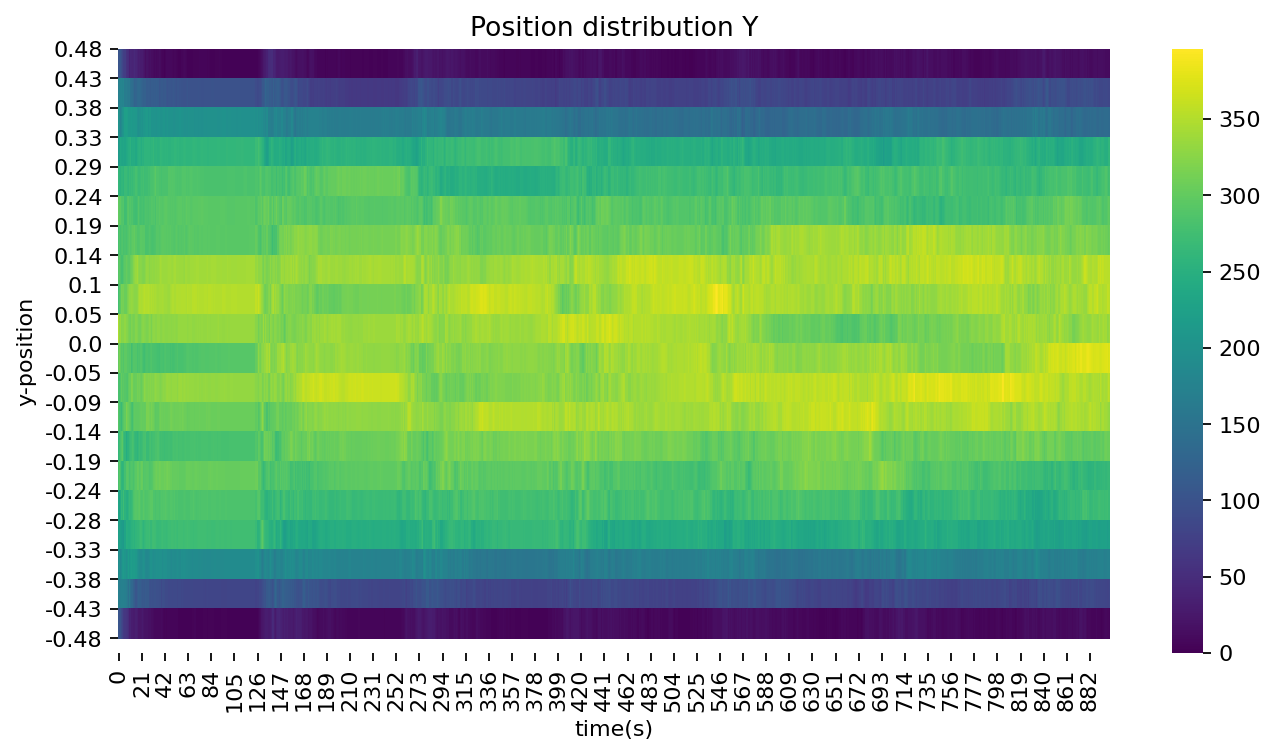

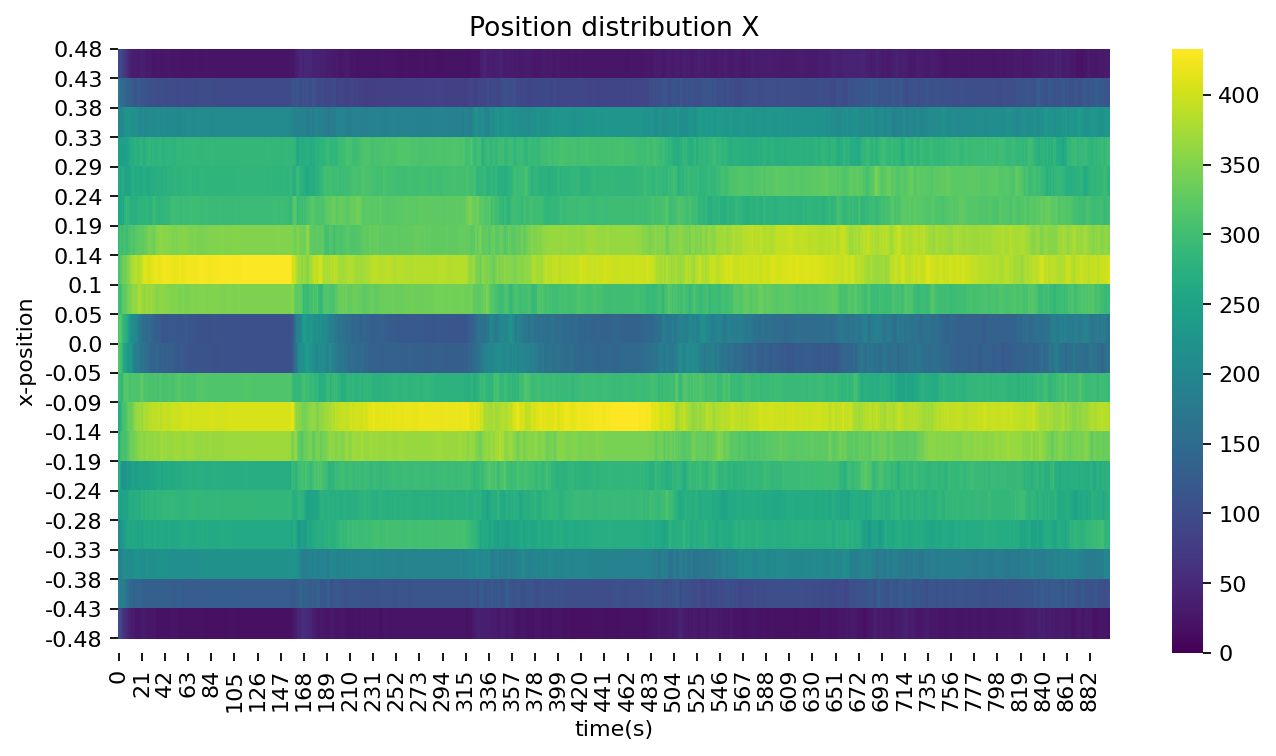

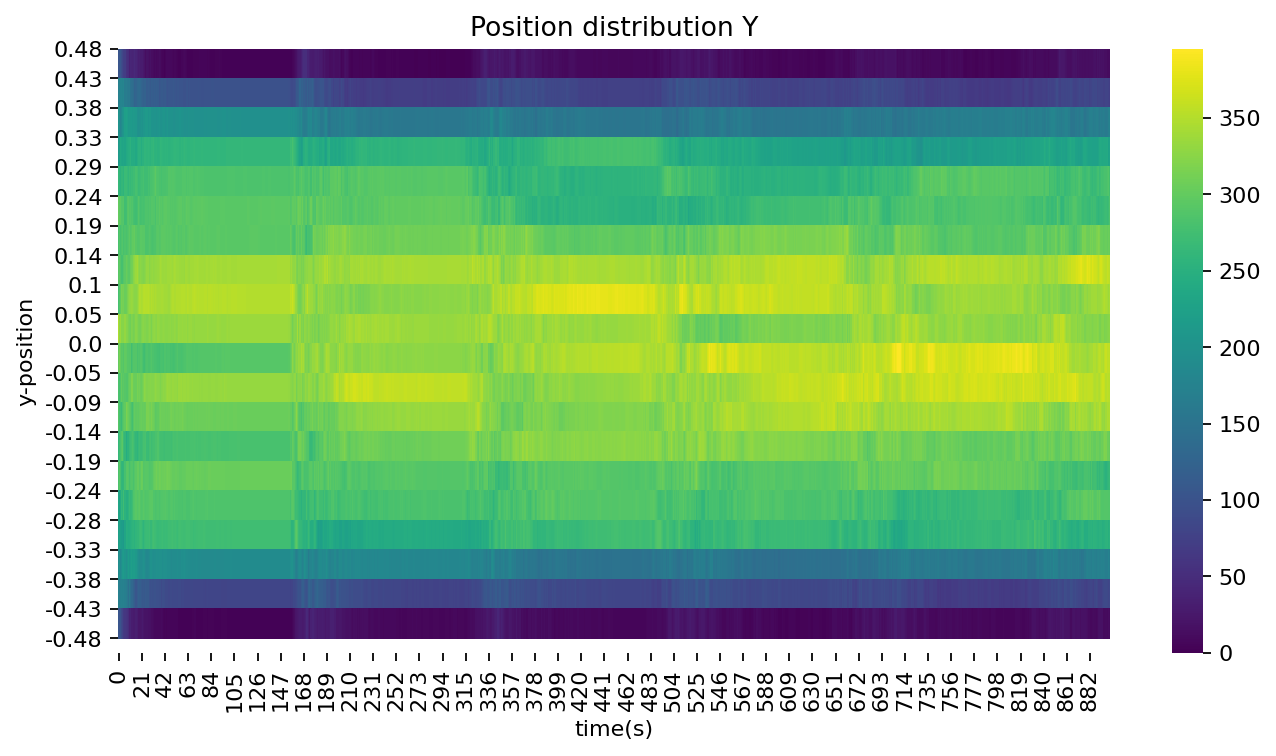

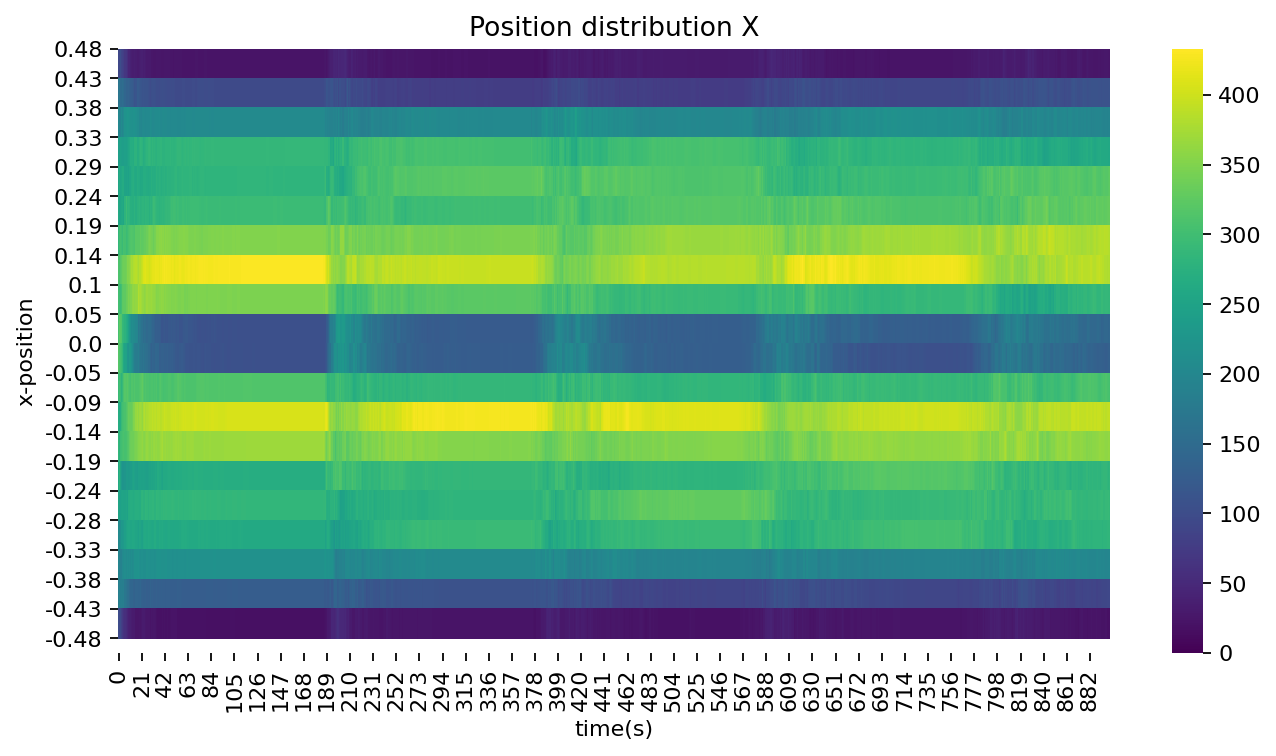

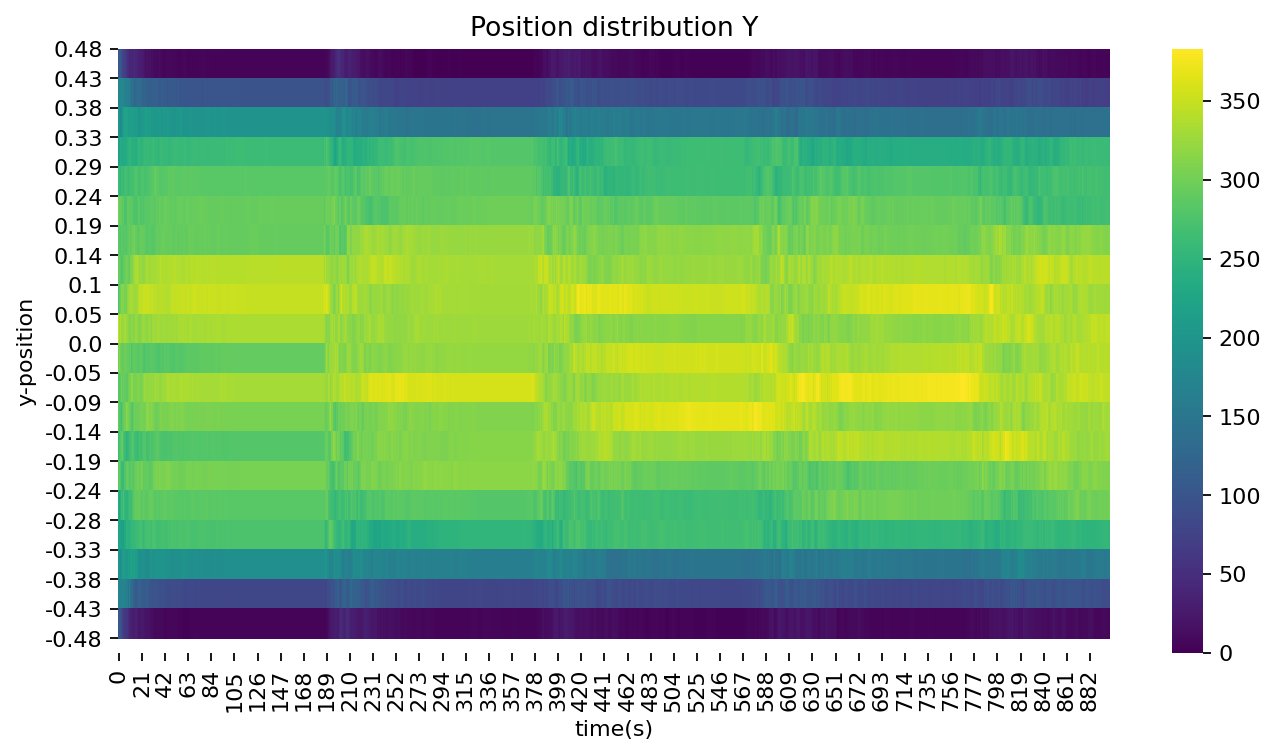

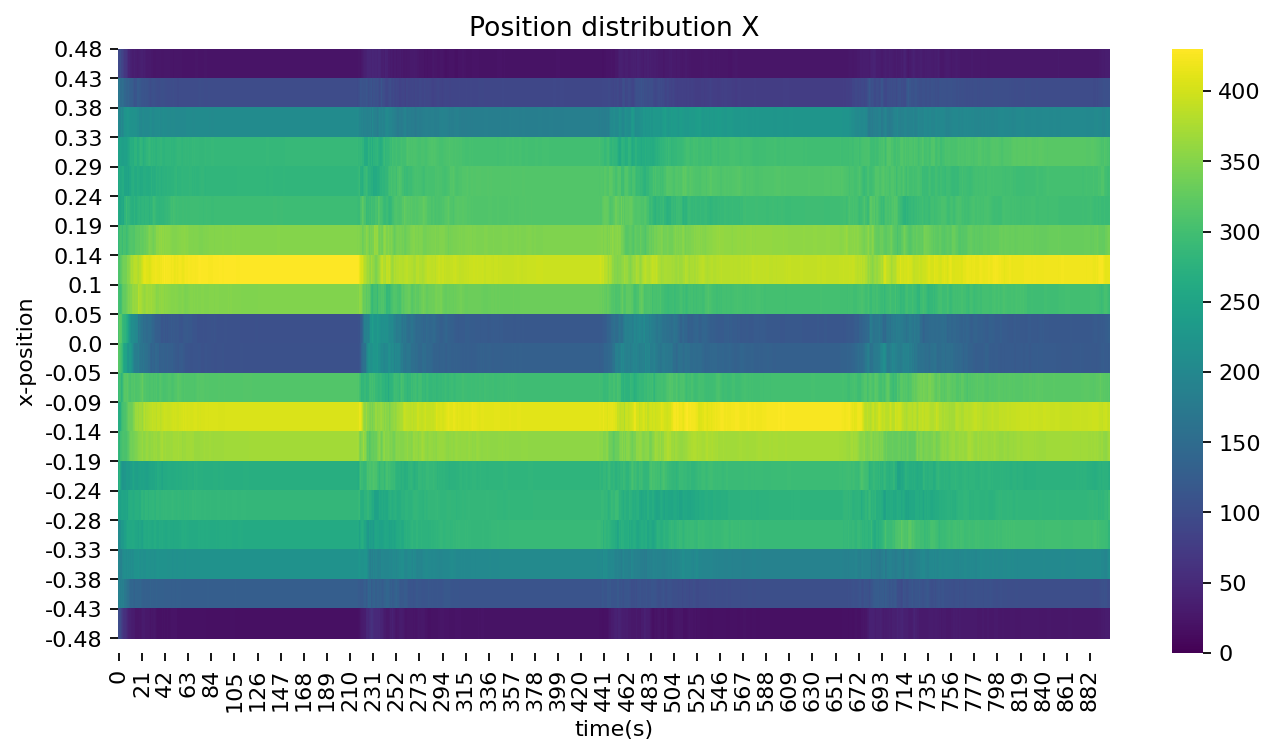

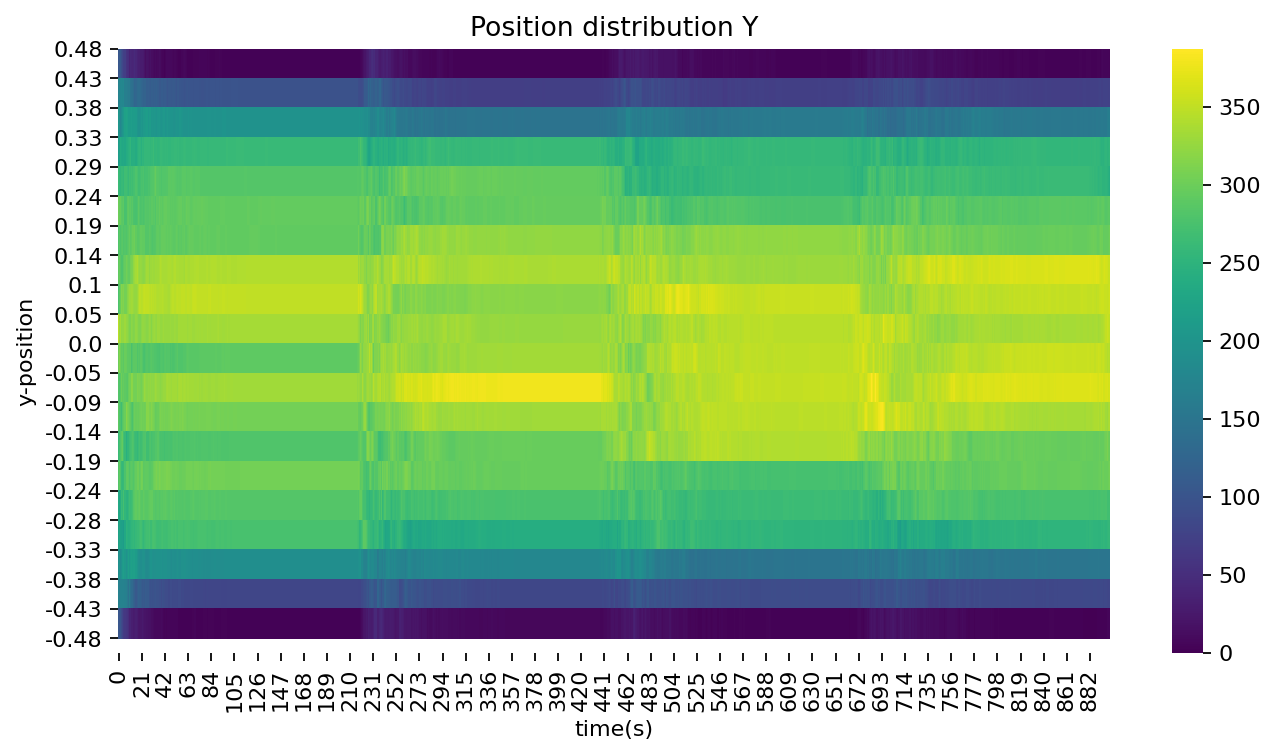

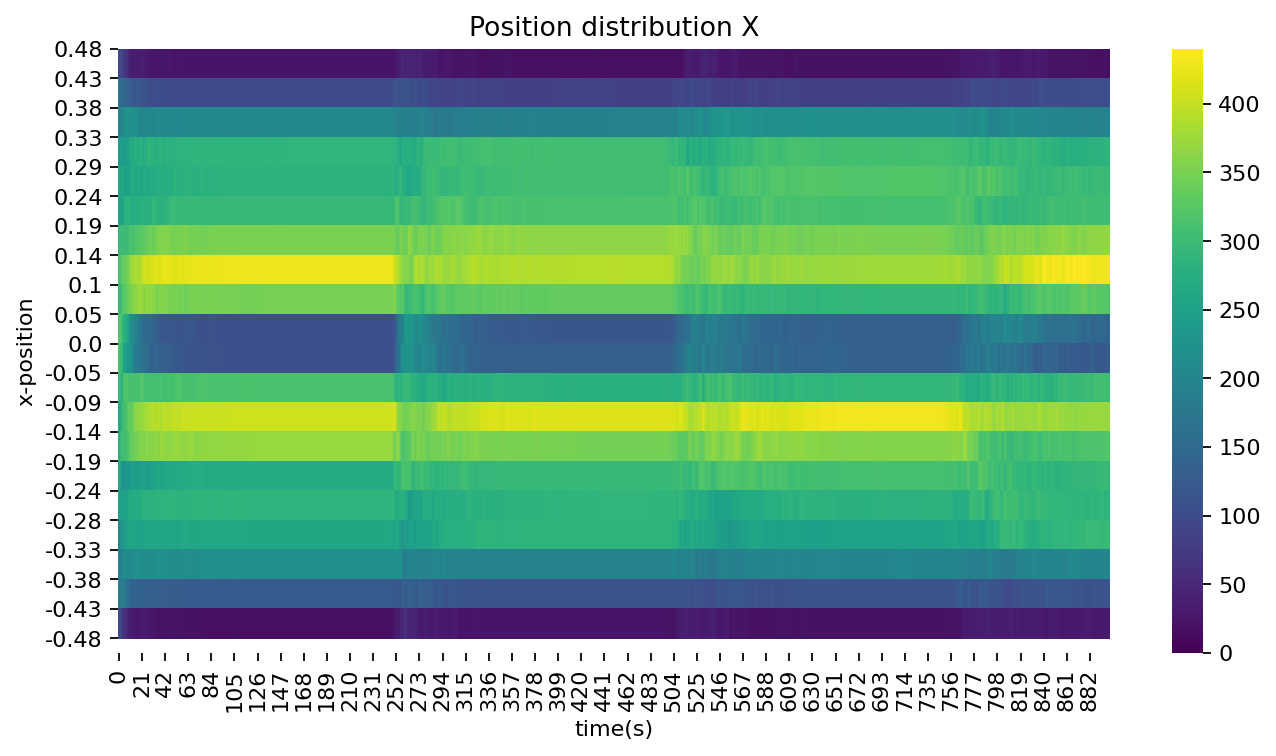

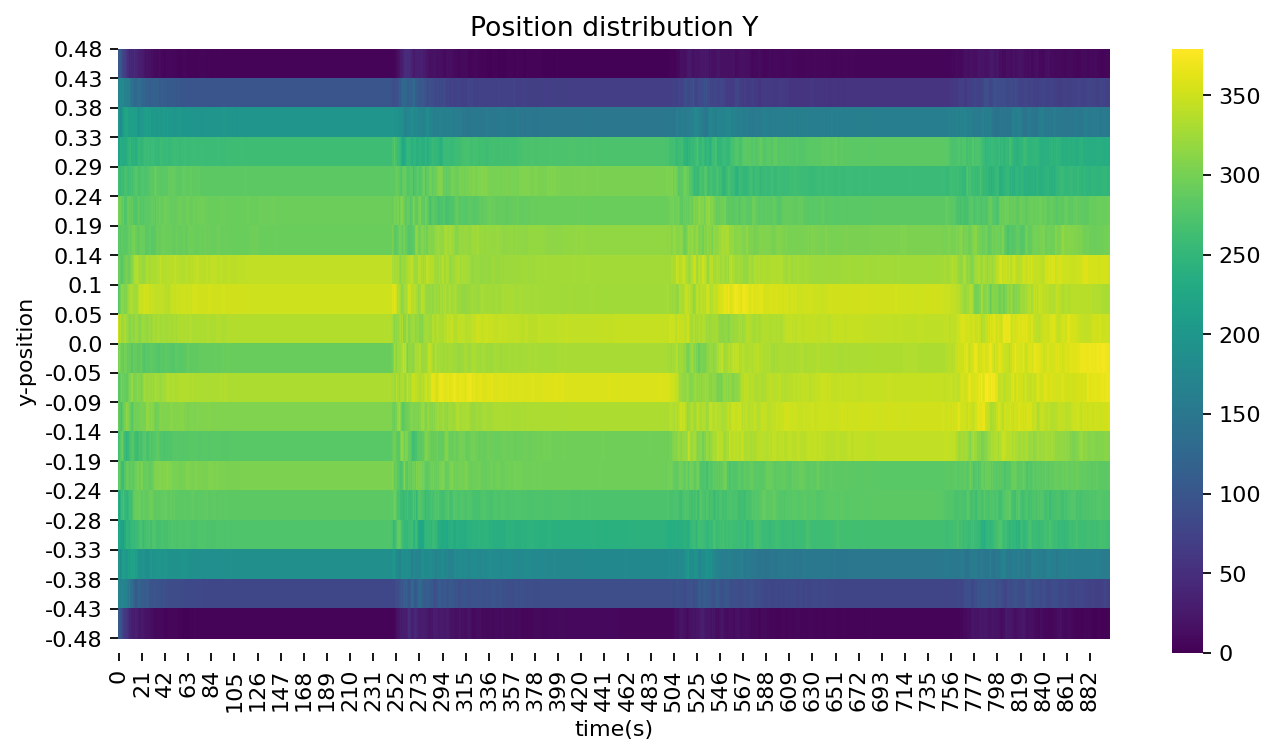

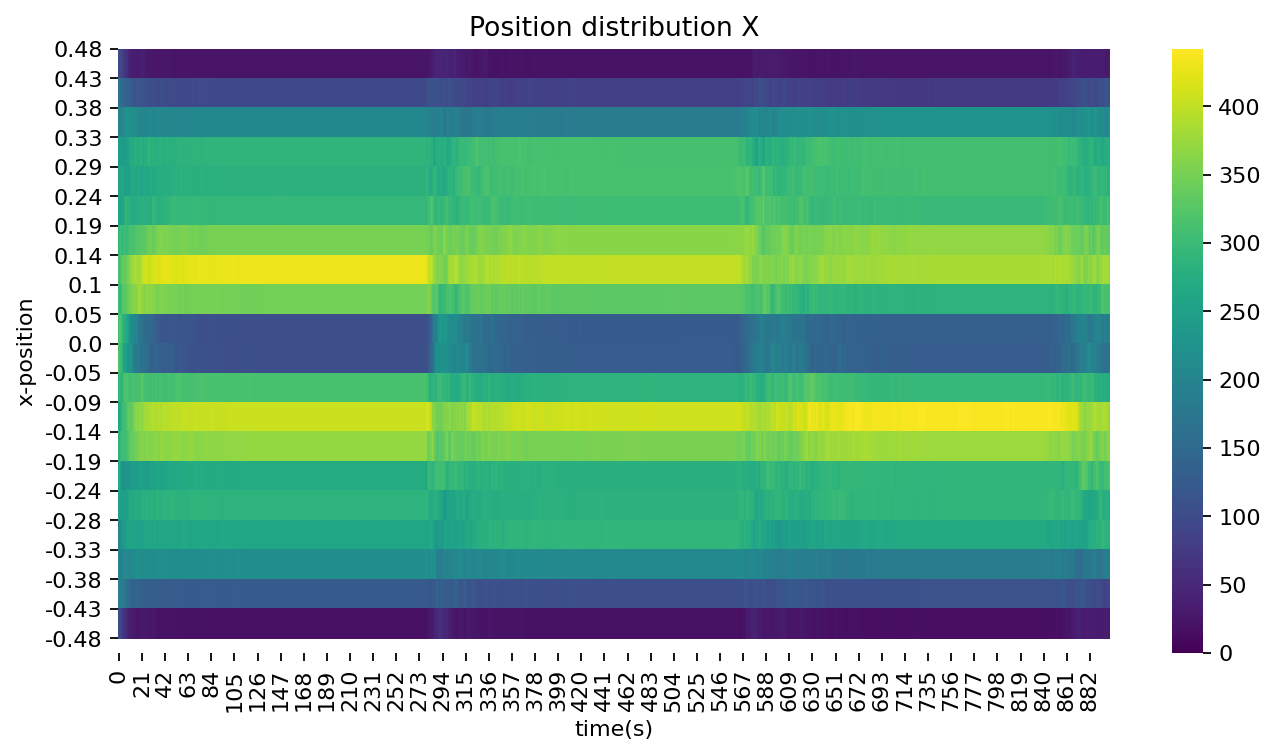

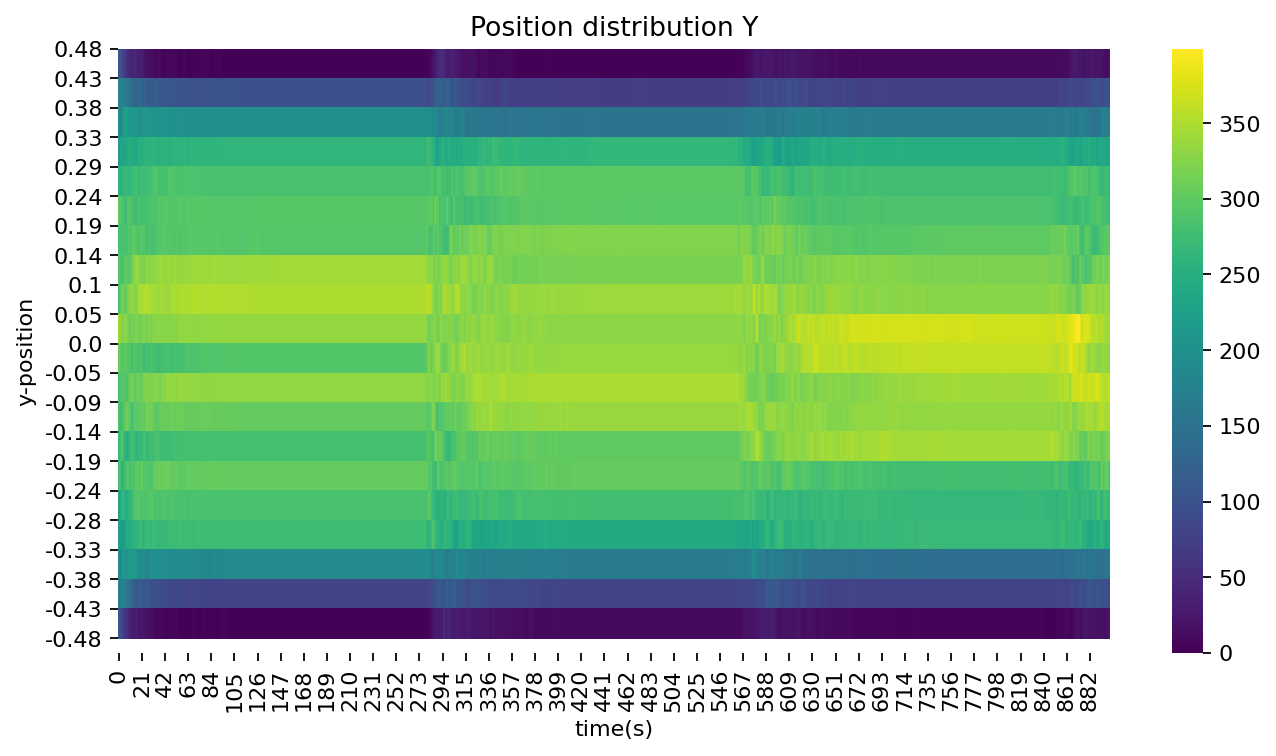

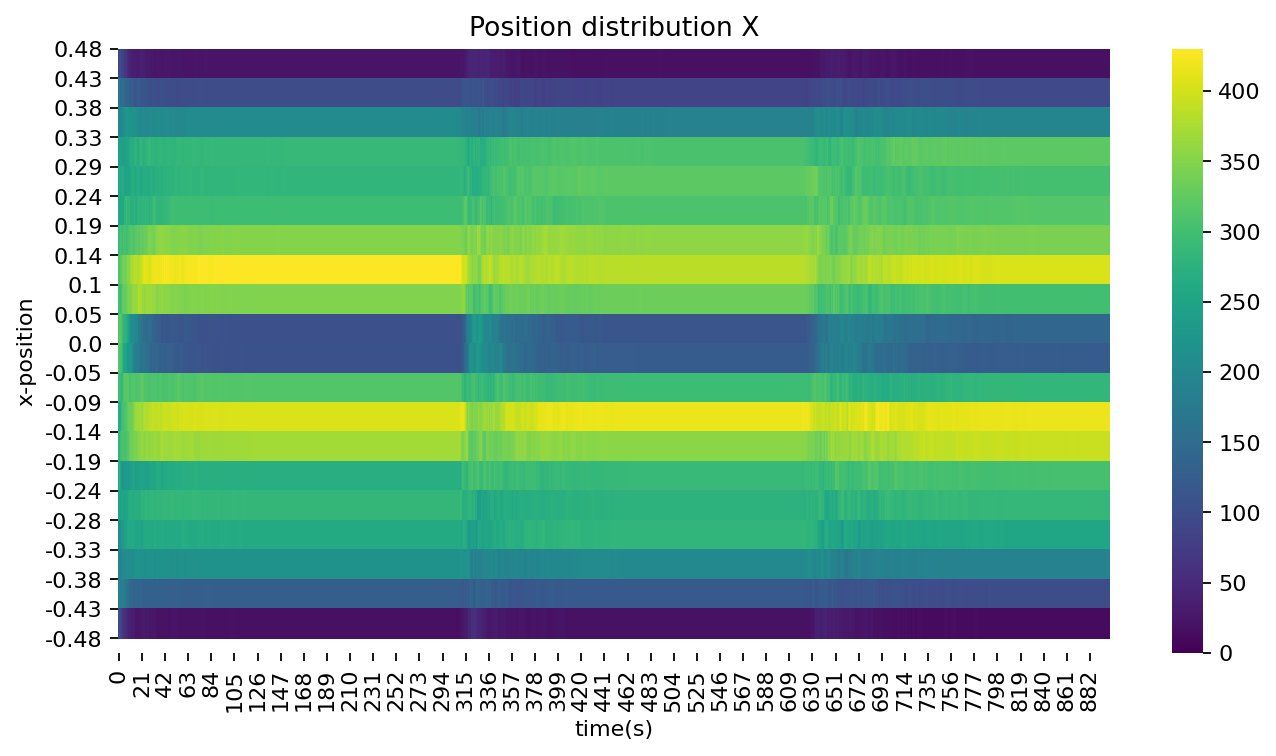

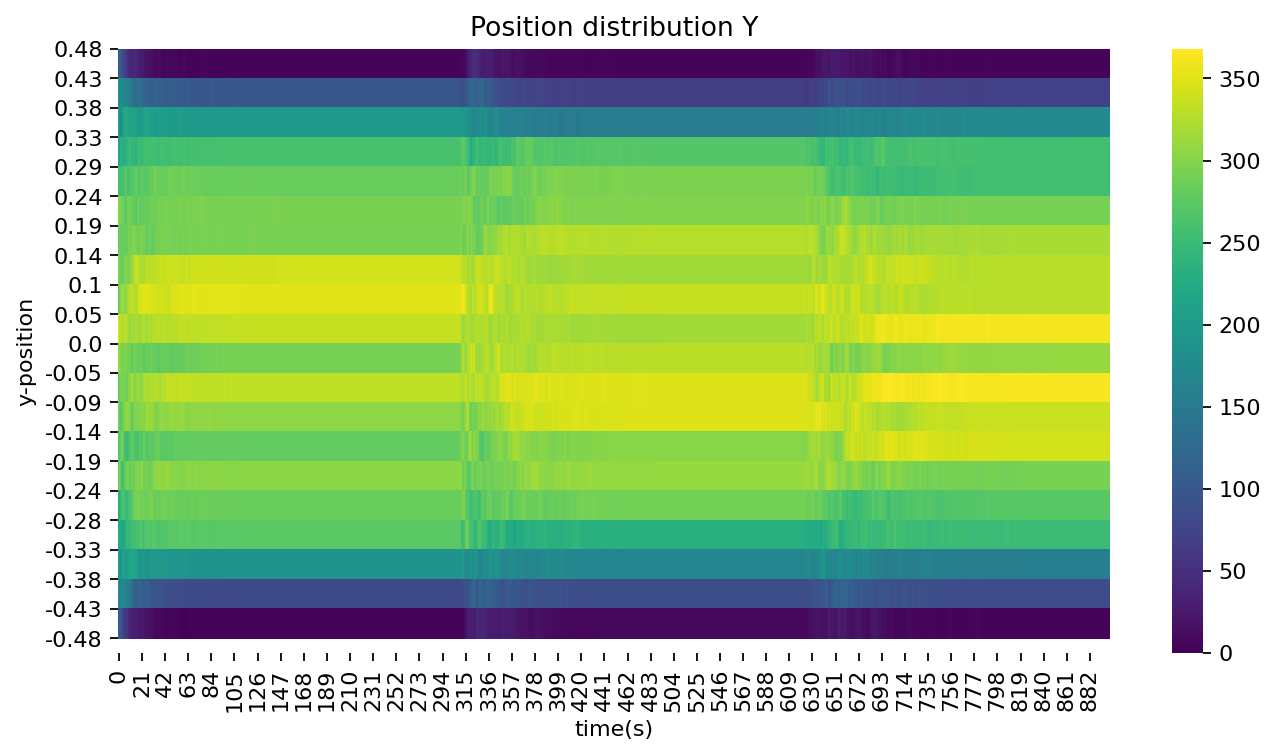

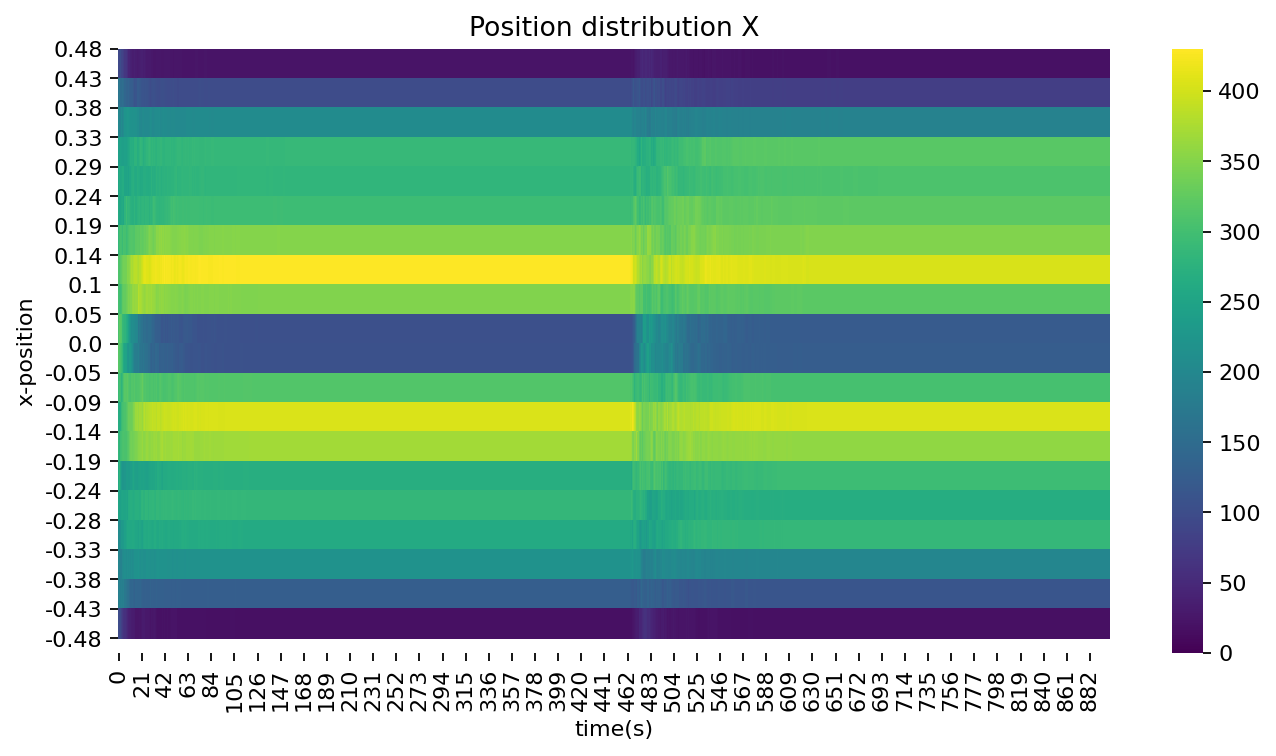

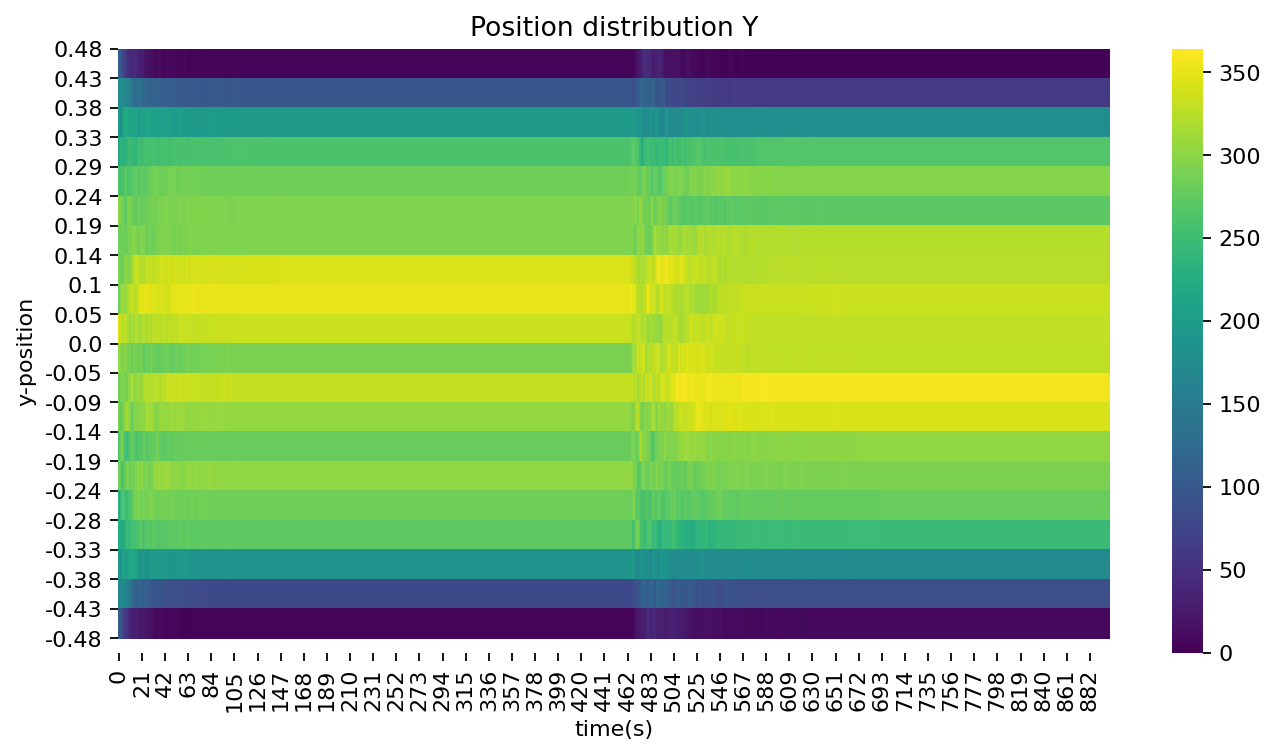

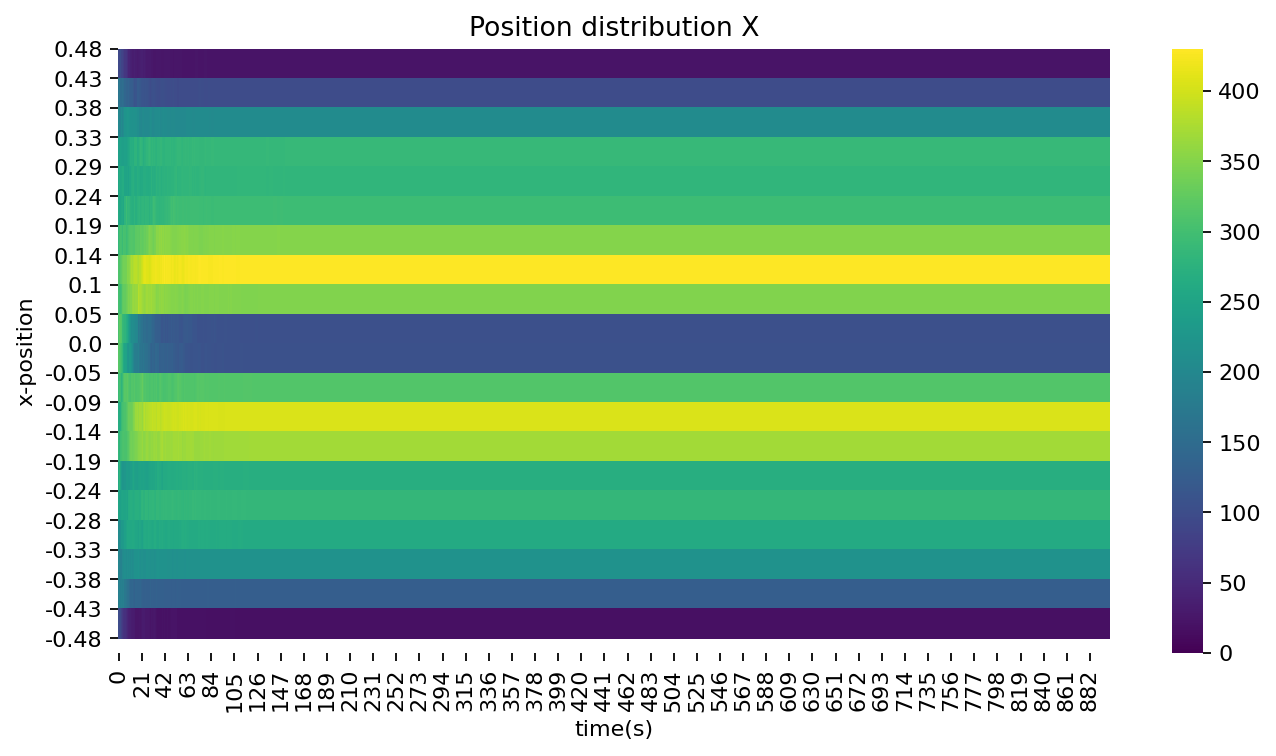

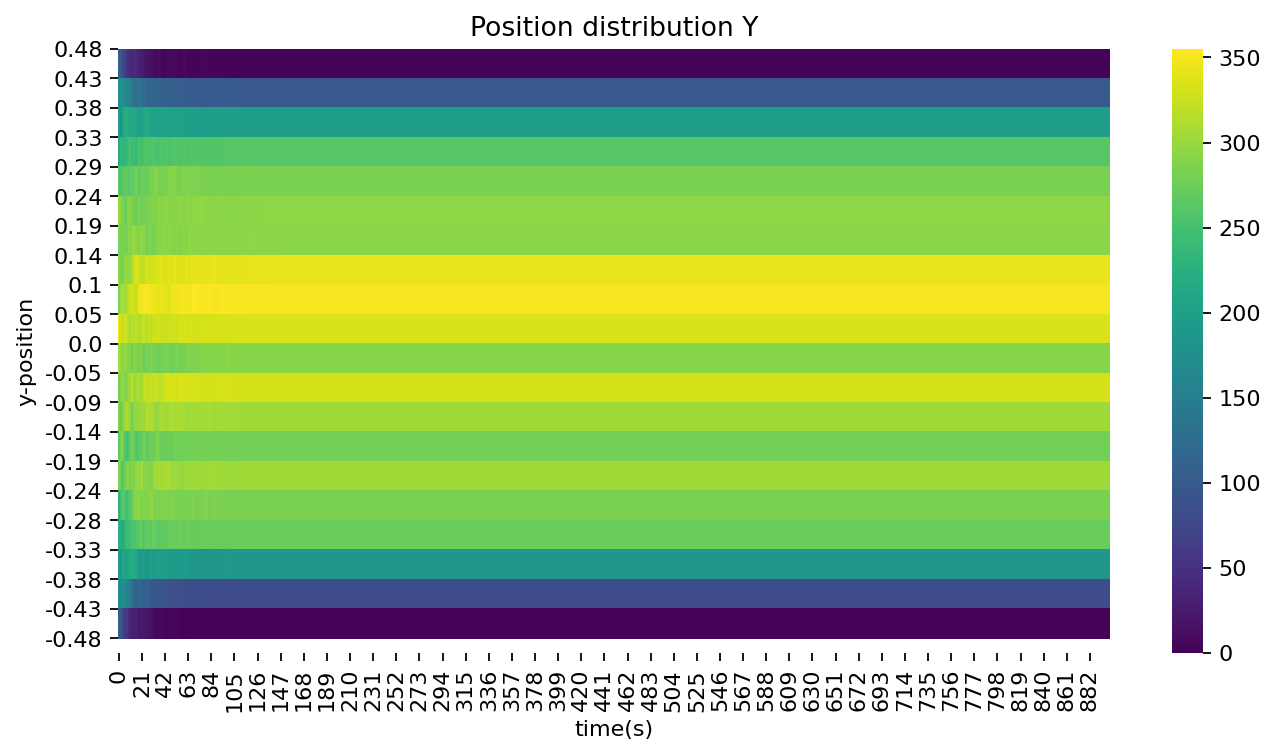

In [25]:
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("Timeout folder:", 'blue'),timeout_folder)
    
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
            timeout = int(param.split("#")[-1]) * 10
            print("\ttimeout:",timeout)
    
#     if timeout == 20 :
#         break
        
    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    df_X_position = pd.DataFrame()
    df_Y_position = pd.DataFrame()
    
    for filename in natsorted(os.listdir(os.path.join(results_folder, timeout_folder))):
        if filename.endswith("kiloLOG.tsv"):
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                continue
            print('\tfilename: ', filename)
            seed = int(filename.split("_")[0].split("#")[1])
#             if seed == 2:
#                 break
            
            df_kiloPOS = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            df_kiloPOS.columns = kiloLOG_label
                    
            if df_X_position.empty:
                df_X_position = df_kiloPOS[kiloPOSX_label]
            else:
                df_X_position = df_X_position.join(df_kiloPOS[kiloPOSX_label], lsuffix='', rsuffix='_'+str(seed))
            
            if df_Y_position.empty:
                df_Y_position = df_kiloPOS[kiloPOSY_label]
            else:
                df_Y_position = df_Y_position.join(df_kiloPOS[kiloPOSY_label], lsuffix='', rsuffix='_'+str(seed))
                
        else:
            continue
            
    hist_val_x = np.array([])
    for x in df_X_position.values:
    #     print(x.size)
        hist_x,_= np.histogram(x,bin_edges)
        hist_val_x = np.vstack([hist_val_x, hist_x]) if hist_val_x.size else hist_x
    
    x_values = np.flip(hist_val_x.T, 0)
    x_edges = np.flip(bin_edges.round(decimals=2))

    fig = plt.figure(figsize=(10, 5), dpi=160)
    # plt.xlabel('time(s)')
    yticks = x_edges

    
    # print("\t v_max:", v_max)
    ax = sns.heatmap(x_values, yticklabels=yticks, cmap="viridis", vmin=0)
    ax.set_title("Position distribution X")
    ax.set_xlabel('time(s)')
    plt.ylabel('x-position')
    plt.yticks(np.arange(x_edges.size), yticks)
    plt.savefig("position_distribution_X_timeout"+str(timeout)+".png")
#     plt.show()
    
    
    
    hist_val_y = np.array([])
    for y in df_Y_position.values:
    #     print(x.size)
        hist_y,_= np.histogram(y,bin_edges)
        hist_val_y = np.vstack([hist_val_y, hist_y]) if hist_val_y.size else hist_y
    
    y_values = np.flip(hist_val_y.T, 0)
    y_edges = np.flip(bin_edges.round(decimals=2))

    fig = plt.figure(figsize=(10, 5), dpi=160)
    # plt.xlabel('time(s)')
    yticks = y_edges



    # print("\t v_max:", v_max)
    ax = sns.heatmap(y_values, yticklabels=yticks, cmap="viridis", vmin=0)
    ax.set_title("Position distribution Y")
    ax.set_xlabel('time(s)')
    plt.ylabel('y-position')
    plt.yticks(np.arange(y_edges.size), yticks)
    plt.savefig("position_distribution_Y_timeout"+str(timeout)+".png")
#     plt.show()
        

In [24]:
df_kiloPOS.shape

(901, 289)

In [ ]:
len(kiloLOG_label)

In [ ]:
df_kiloPOS.iloc[:1,:]

In [ ]:
hist_val = np.array([])
for x in df_kiloPOS[kiloPOSX_label].values:
#     print(x.size)
    hist,_= np.histogram(x,bin_edges)
    hist_val = np.vstack([hist_val, hist]) if hist_val.size else hist


values = np.flip(hist_val.T, 0)
y_edges = np.flip(bin_edges.round(decimals=2))

fig = plt.figure(figsize=(10, 5), dpi=80)
# plt.xlabel('time(s)')
yticks = y_edges



# print("\t v_max:", v_max)
ax = sns.heatmap(values, yticklabels=yticks, cmap="viridis", vmin=0)#, vmax=40)
ax.set_title("Position distribution")
ax.set_xlabel('time(s)')
plt.ylabel('y-position')
plt.yticks(np.arange(y_edges.size), yticks)
# plt.savefig("position_distribution_equal_resources"+seed+".png")
plt.show()